# Graph Mining

- structure: node(vertex; entity), edge(link; relation; predicate), attribute
- input data: edgelist/adjacency matrix
- network 종류
  - directed v.s. undirected: 방향성의 여부
  - weighted v.s. unweighted: edge의 weight
  - multi-relational: relation type의 개수 (`nx.MultiGraph()`, `nx.MultiDiGraph()`)
  - bipartite graph (이분 그래프): 정점을 2그룹으로 나눌 수 있으되 같은 그룹의 정점끼리는 간선으로 이어지지 않은 경우
    - 학생 - 수업: 학생들이 어떤 수업을 듣고 있는지
    - 유저 - 선호 영화: 각 유저가 어떠한 영화를 선호하는지
    - 구직자 - 선호 회사: 각 구직자가 어떠한 회사를 선호하는지

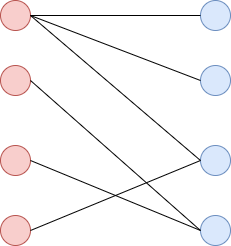

- Software: [Gephi](https://gephi.org/), [Ucinet](https://sites.google.com/site/ucinetsoftware/home), R (igraph), Python (networkx), nodeXL

# Step 1. Graph
- `networkx`를 통해 다양한 유형의 네트워크를 생성할 수 있음
  - `nx.Graph()`: undirected graph
  - `nx.DiGraph()`: directed graph

## 1) From Scratch (Edgelist)

In [1]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph() #DiGraph, MultiGraph....

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음
G

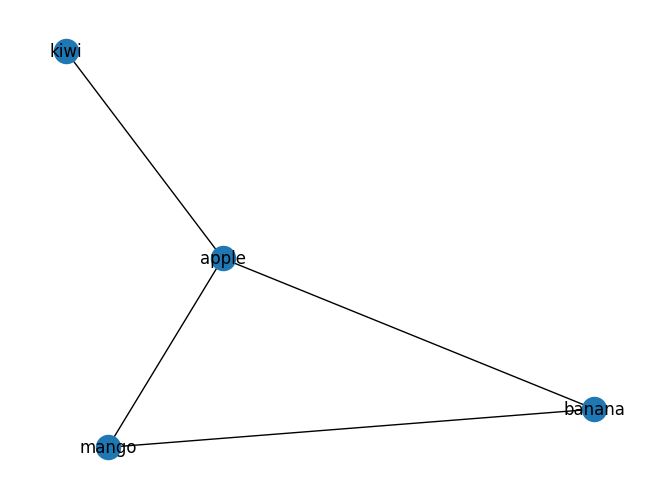

In [15]:
nx.draw(G, with_labels=True)
plt.show()

In [19]:
G.edges
G.nodes

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [20]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of nodes:', nx.number_of_edges(G))

Nodes: ['apple', 'banana', 'kiwi', 'mango']
Number of nodes: 4
Edges: [('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')]
Number of nodes: 4


In [21]:
print(G)

Graph with 4 nodes and 4 edges


- degree: node와 연결된 모든 edge의 수

In [22]:
degree = nx.degree(G)
print(degree)

[('apple', 3), ('banana', 2), ('kiwi', 1), ('mango', 2)]


In [23]:
print(list(G.neighbors('banana')))

['apple', 'mango']


- Directed graph의 경우 다음과 같이 생성 가능

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G_directed = nx.DiGraph()

G_directed.add_nodes_from(Fruits)
G_directed.add_edges_from(relations)

In [25]:
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('apple', 2), ('banana', 2), ('kiwi', 0), ('mango', 0)]
out-degree: [('apple', 1), ('banana', 0), ('kiwi', 1), ('mango', 2)]


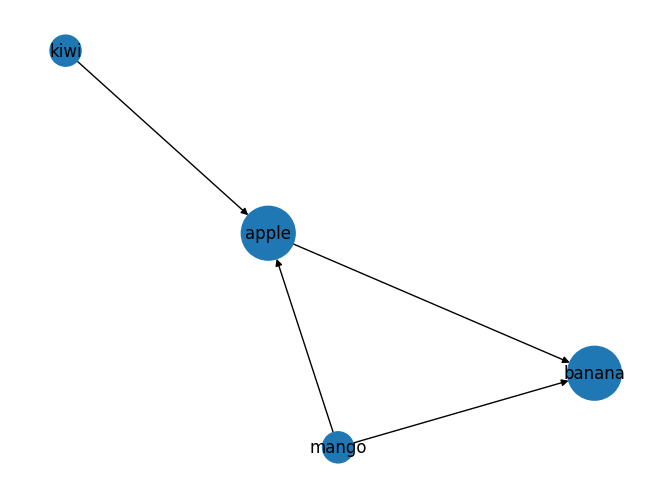

In [26]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G_directed, node_size=[500 + v[1]*500 for v in in_degree], with_labels=True)  #****************************************************

## 2) From Scratch (Adjacency matrix)

많이 쓰지 않음 넘어감

In [27]:
# Adjacency matrix
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]


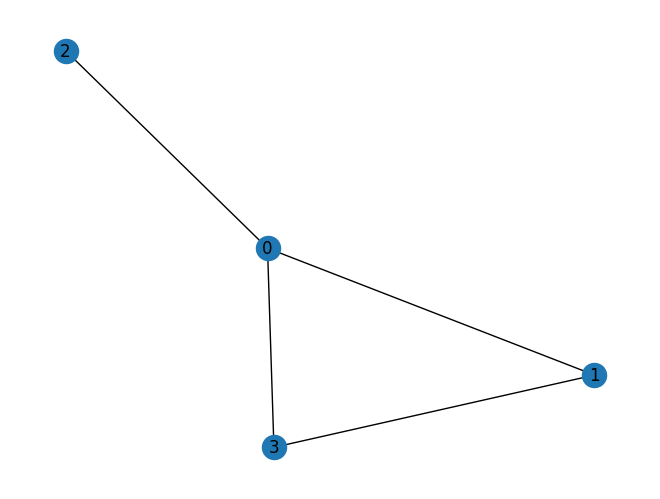

{0: 'apple', 1: 'banana', 2: 'kiwi', 3: 'mango'}


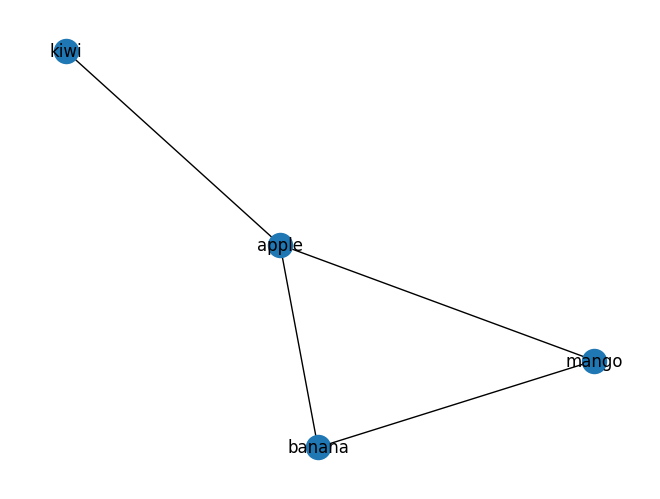

In [28]:
G_Adjacency=nx.from_numpy_array(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)
nx.draw(G_Adjacency, with_labels=True)
plt.show()

mapping = {i: f for i, f in enumerate(Fruits)}
print(mapping) # 변경할 label 형태

H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True)
plt.show()

## 3) From Dataset

In [29]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
G_data = nx.read_edgelist('facebook_combined.txt', delimiter=" ")
print(G_data)

Graph with 4039 nodes and 88234 edges


In [ ]:
G_data.edges

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

 cora.cites로 그래프 GG \\
 '\t' 탭 문자 \\

 그래프 나오는 거 시험 문제 나올 것 같아

In [36]:
GG=nx.read_edgelist('cora.cites',delimiter="\t")
print(GG)

Graph with 2708 nodes and 5278 edges


# Step 2. Attribute

## Edge attribute (weight)

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

Fruits = ['apple', 'banana', 'kiwi', 'mango']
G_weighted = nx.Graph()
G_weighted.add_nodes_from(Fruits)

In [38]:
# Case 1
weighted_relations = [('apple', 'banana', {'weight': 7}), ('kiwi', 'apple', {'weight': 4}), ('mango', 'apple', {'weight': 3}), ('mango', 'banana', {'weight': 5})]
G_weighted.add_edges_from(weighted_relations)
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 7}), ('apple', 'kiwi', {'weight': 4}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 5})]


In [39]:
# Case 2
G_weighted['apple']['banana']['weight']=5
G_weighted['apple']['kiwi']['weight']=2
G_weighted['apple']['mango']['weight']=3
G_weighted['banana']['mango']['weight']=4
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 5}), ('apple', 'kiwi', {'weight': 2}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 4})]


In [40]:
nx.to_numpy_array(G_weighted)

array([[0., 5., 2., 3.],
       [5., 0., 0., 4.],
       [2., 0., 0., 0.],
       [3., 4., 0., 0.]])

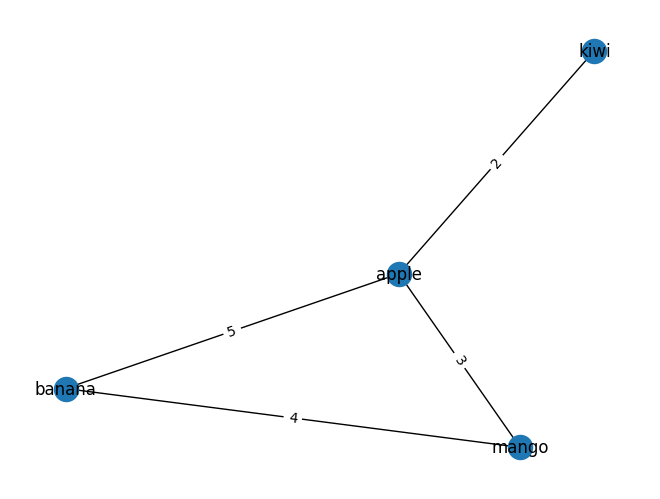

In [41]:
labels = nx.get_edge_attributes(G_weighted, 'weight')

pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)

plt.show()

In [42]:
print('전체 shortest path:\n',nx.shortest_path(G_weighted))
print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi'))
# print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi', weight='weight')) # 여러 route가 있을 때 weight을 고려하여 shortest path 계산

전체 shortest path:
 {'apple': {'apple': ['apple'], 'banana': ['apple', 'banana'], 'kiwi': ['apple', 'kiwi'], 'mango': ['apple', 'mango']}, 'banana': {'banana': ['banana'], 'apple': ['banana', 'apple'], 'mango': ['banana', 'mango'], 'kiwi': ['banana', 'apple', 'kiwi']}, 'kiwi': {'kiwi': ['kiwi'], 'apple': ['kiwi', 'apple'], 'banana': ['kiwi', 'apple', 'banana'], 'mango': ['kiwi', 'apple', 'mango']}, 'mango': {'mango': ['mango'], 'apple': ['mango', 'apple'], 'banana': ['mango', 'banana'], 'kiwi': ['mango', 'apple', 'kiwi']}}
banana to kiwi: ['banana', 'apple', 'kiwi']


# Step 3. Graph Metric

## 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명)
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [43]:
print('diamter:', nx.diameter(G_data))#****************************************************
print('density:', nx.density(G_data))#****************************************************
print('transitivity:', nx.transitivity(G_data))#****************************************************
print('reciprocity:', nx.reciprocity(G_data))#****************************************************

diamter: 8
density: 0.010819963503439287
transitivity: 0.5191742775433075
reciprocity: 0.0


## 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가?
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


In [44]:
G2 = nx.read_edgelist( "cora.cites", create_using=nx.DiGraph(), nodetype=int) #****************************************************

In [45]:
print('degree centrality:\n', nx.degree_centrality(G2))                  #****************************************************
print('betweenness centrality:\n', nx.betweenness_centrality(G2))#****************************************************
print('closeness centrality:\n', nx.closeness_centrality(G2))#****************************************************
print('eigenvector centrality:\n', nx.eigenvector_centrality(G2))#****************************************************

degree centrality:
 {35: 0.06243073513114149, 1033: 0.001847063169560399, 103482: 0.0022164758034724785, 103515: 0.004063538973032878, 1050679: 0.0014776505356483192, 1103960: 0.001847063169560399, 1103985: 0.0007388252678241596, 1109199: 0.0011082379017362393, 1112911: 0.0014776505356483192, 1113438: 0.001847063169560399, 1113831: 0.0011082379017362393, 1114331: 0.001847063169560399, 1117476: 0.0011082379017362393, 1119505: 0.0007388252678241596, 1119708: 0.001847063169560399, 1120431: 0.0014776505356483192, 1123756: 0.0014776505356483192, 1125386: 0.0014776505356483192, 1127430: 0.0007388252678241596, 1127913: 0.0014776505356483192, 1128204: 0.0007388252678241596, 1128227: 0.0014776505356483192, 1128314: 0.0011082379017362393, 1128453: 0.0014776505356483192, 1128945: 0.0003694126339120798, 1128959: 0.0007388252678241596, 1128985: 0.0014776505356483192, 1129018: 0.0007388252678241596, 1129027: 0.0007388252678241596, 1129573: 0.0011082379017362393, 1129683: 0.001847063169560399, 112977

## 3) Link Prediction
- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측
- [indices](https://medium.com/neo4j/link-prediction-with-neo4j-part-1-an-introduction-713aa779fd9): Common Neighbors, Adamic Adar, Preferential Attachment, Katz 등 [networkx](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)에서 일부 link prediction metrics 제공

In [46]:
G2 = nx.read_edgelist( "cora.cites", nodetype=int)
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G2, e[0], e[1])))) for e in nx.non_edges(G2)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:10]

[(114, 6213, 20),
 (1365, 19621, 12),
 (1365, 3229, 11),
 (230879, 2665, 11),
 (12576, 56115, 10),
 (35, 14062, 7),
 (114, 4584, 7),
 (114, 6214, 7),
 (1365, 4584, 7),
 (114, 117, 6)]

In [47]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G2)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(114, 6213) -> 286.79999999999995
(1365, 19621) -> 280.4
(1365, 3229) -> 279.59999999999997
(230879, 2665) -> 279.59999999999997
(12576, 56115) -> 278.79999999999995
(35, 14062) -> 276.4
(114, 4584) -> 276.4
(114, 6214) -> 276.4
(1365, 4584) -> 276.4
(114, 117) -> 275.59999999999997


In [48]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G2)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(114, 6213) -> 12.135810271097586
(1365, 3229) -> 10.97941357536982
(1365, 19621) -> 10.05061687685061
(230879, 2665) -> 6.849705281884632
(12576, 56115) -> 6.128741696976914
(1365, 4584) -> 5.948538404150826
(38205, 57119) -> 5.759646697968469
(27623, 27627) -> 4.872083856277795
(35, 14062) -> 4.872083856277794
(1272, 10169) -> 4.516976828849246


In [49]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G2)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(35, 6213) -> 13104
(35, 1365) -> 12432
(35, 3229) -> 10920
(35, 910) -> 7392
(35, 114) -> 7056
(35, 4330) -> 6720
(35, 3231) -> 6048
(1365, 6213) -> 5772
(35, 1272) -> 5712
(35, 19621) -> 5544
